In [2]:
import numpy as np
import matplotlib.pyplot as plt
import STOM_higgs_tools
from tqdm.notebook import tqdm
from mpl_toolkits.mplot3d import Axes3D

**Section 1** : Generating Data Points

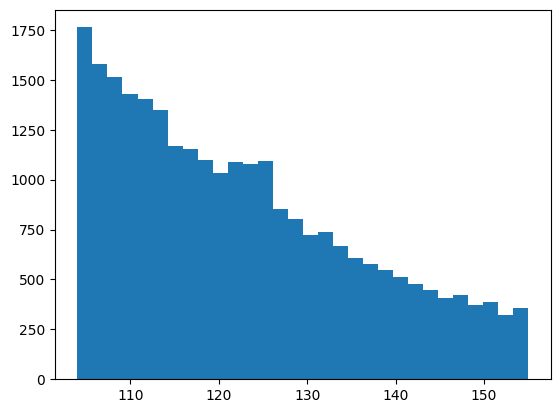

In [45]:
vals = STOM_higgs_tools.generate_data()
nbins=30
mass_range=[104,155]
bin_heights, bin_edges, patches = plt.hist(vals, range = mass_range, bins = nbins)
plt.show() 

**Section 2a**: Max likelihood method

**Section 2b**: $\chi^2$ Minimisation

Create a range of A and lambda values. For each value of A (`A[i]`), cycle through every lambda value (`lamb[j]`), and calculate the chi-squared values. Check if chi-squared value is less than previous chi-squared values, if so, set these values of A and lambda as the optimum. 

Note that we only use the range `[104,120]` because we need to ignore the higgs boson bump. 

In [37]:
L=40 #number of A and lambda values to check
A=np.linspace(5e4,7e4,L) #range of predicted A values
lamb=np.linspace(27,33,L) #range of predicted lambda values
pbar = tqdm(range(L**2))
chi_list_b=[1e6] #placeholder
mass_range_b=[104,120]
nbins_reduced=9
for i in range(L):
    for j in range(L):
        chi=STOM_higgs_tools.get_B_chi(vals,mass_range_b,nbins_reduced,A[i],lamb[j]) * (nbins_reduced - 2)
        if chi < np.min(chi_list_b):
            chi_min_b=chi
            lamb_opt_b=lamb[j]
            A_opt_b=A[i]
        chi_list_b=np.append(chi_list_b,chi)
        pbar.update(1)
print(f'lambda = {lamb_opt_b}, A = {A_opt_b}, minimum chi={chi_min_b}')

  0%|          | 0/1600 [00:00<?, ?it/s]

lambda = 28.692307692307693, A = 70000.0, minimum chi=13.912349641006893


**Section 3:** Goodness of fit

Find fit using optimised parameters:

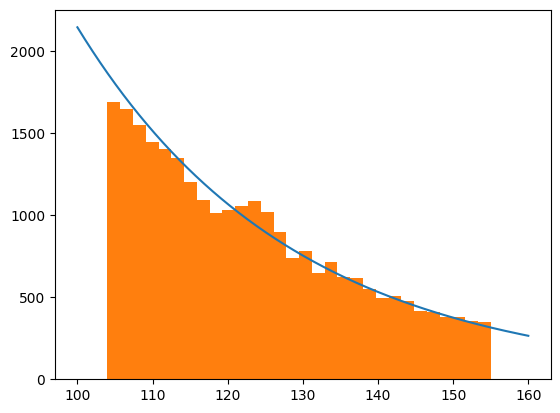

In [38]:
x=np.linspace(100,160,10000)
y=STOM_higgs_tools.get_B_expectation(x,A_opt_b,lamb_opt_b)
plt.plot(x,y)
bin_heights, bin_edges, patches = plt.hist(vals, range = mass_range, bins = nbins)
plt.show() 

Chi-squared value for the *entire* range. Should be less than degrees of freedom `nbins-2`

In [40]:
chi_total = STOM_higgs_tools.get_B_chi(vals,[104,155],30,A_opt_b,lamb_opt_b)*28
print(chi_total)

111.21556575040537


**Section 4a**: Running the same $\chi^2$ minimisation, but *not* ignoring the Higgs signal. 

In [41]:
L=40#number of A and lambda values to check
A=np.linspace(5e4,10e4,L) #range of predicted A values
lamb=np.linspace(20,40,L) #range of predicted lambda values
pbar = tqdm(range(L**2))
chi_list_s=[1e6] #placeholder
mass_range_s=[104,155]
nbins=30
for i in range(L):
    for j in range(L):
        chi=STOM_higgs_tools.get_B_chi(vals,mass_range_s,nbins,A[i],lamb[j]) * (nbins -2)
        if chi < np.min(chi_list_s):
            chi_min=chi
            lamb_opt_s=lamb[j]
            A_opt_s=A[i]
        chi_list_s=np.append(chi_list_s,chi)
        pbar.update(1)
print(f'lambda = {lamb_opt_s}, A = {A_opt_s}, minimum chi={chi_min}')

  0%|          | 0/1600 [00:00<?, ?it/s]

lambda = 30.256410256410255, A = 55128.205128205125, minimum chi=98.17820205482943


In [46]:
chi_total = STOM_higgs_tools.get_B_chi(vals,[104,155],30,A_opt_b,lamb_opt_b)*28
print(chi_total)

119.99854213320154


**Section 4b**: Finding mean $\chi^2$ value over many signal generations (background only)

In [8]:
A_opt = A_opt_b
lamb_opt = lamb_opt_b

simulations = 100000

chi_list = []

pbar = tqdm(range(simulations))
for i in range(simulations):
    vals=STOM_higgs_tools.generate_data()
    nbins=30
    mass_range =[104,155]
    chi=STOM_higgs_tools.get_B_chi(vals,mass_range,nbins,A_opt,lamb_opt)
    chi_list=np.append(chi_list,chi)
    pbar.update(1)

chi_range=[0,10]
chi_bins = 20
bin_heights, bin_edges, patches = plt.hist(chi_list, range = [0,10], bins = chi_bins)

  0%|          | 0/100000 [00:00<?, ?it/s]

KeyboardInterrupt: 

**Section 4c:** Finding mean $\chi^2$ value with various signal amplitudes

**Section 5a**: Signal Estimation using background parameterisation

Overlaying the signal

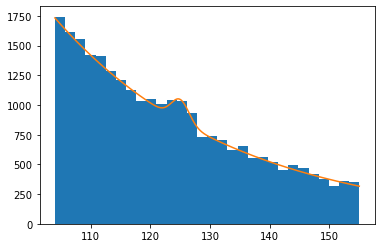

In [34]:
A_opt= A_opt_b
lamb_opt= lamb_opt_t
mass_range=[104,155]

bin_heights, bin_edges, patches = plt.hist(vals, range = mass_range, bins = 30)

signal_mean = 125 
signal_sig = 1.5
signal_amp = 700

x=np.linspace(104,155,10000)
y=STOM_higgs_tools.get_SB_expectation(x,A_opt,lamb_opt,signal_mean,signal_sig,signal_amp)
plt.plot(x,y)
plt.show() 

Finding $\chi^2$

In [35]:
half_bin_width = 0.5*(bin_edges[1] - bin_edges[0])
#recalculate ys_expected, but using half-bin widths
ys_expected = STOM_higgs_tools.get_SB_expectation(bin_edges+half_bin_width, A_opt, lamb_opt, signal_mean, signal_sig, signal_amp)
chi = 0

for i in range( len(bin_heights) ):
    chi_nominator = (bin_heights[i] - ys_expected[i])**2
    chi_denominator = ys_expected[i]
    chi += chi_nominator / chi_denominator

print(chi)

42.03396432582074


**Section 5b:** Unknown Mass